<a href="https://colab.research.google.com/github/shawnmuhr/BIOL_398/blob/main/HW_Solutions/biol300_hw8_group_problem3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This problem will explore Fisher's argument that Mendel's data were *too good*. [You can read more about the controversy here](https://www.colorado.edu/physics/sites/default/files/attached-files/mendelfishercontroversy.pdf). That is, Fisher suspected that the results that Mendel presented from his pea experiments did not vary much as would be expected. To put this to the test, we will simulate Mendel's crossing experiments many times over and see how his published results compare with the simulations.

Below I set up most of the simulation for you. Your remaining task will be to conduct the simulation many times over, computing a desired test statistic each time, and then comparing to the real data to the simulated data.

# The simulation

In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

Let's have python flip a coin for us! If you hit the "play" button below multiple times, you will see the output will switch from heads `'H'` to tails `'T'` randomly.

In [ ]:
# coin flip for heads or tails
random.choice(["H","T"])

'H'

We can now "flip a coin" twice to construct a genotype. Again, if you run this cell of code multiple times, you may see different results each time.

In [ ]:
# two coin flips, one for each allele
allele1 = random.choice(["H","T"])
allele2 = random.choice(["H","T"])

# construct the genotype from the two alleles
genotype = allele1 + allele2

# display the genotype
print(genotype)

TH


Now let's map these coin flips onto a phenotype of interest. As an example, we can correspond the `TT` genotype to green peas and all other genotypes to yellow peas. 

In [ ]:
# TT genotype corresponds to green phenotype
if genotype == "TT":
  phenotype = "green"

# all other genotypes correspond to yellow phenotype
else: 
  phenotype = "yellow"

# display the resulting phenotype
print(phenotype)

yellow


Now let's simulate 100 "coin flips" as a way to get a percent of yellow peas from a Mendelian experiment. For this, we will simulate *each* plant in turn doing a set of coin flips and recording their genotype as a combination of heads and tails.

In [ ]:
def sim_coinflips(num_plants = 100):

  # start a counter for yellow peas
  yellow_count = 0

  # repeat coin flips for each student
  for i in range(num_plants):
    
    # do coin flips to make genotype
    allele1 = random.choice(["H","T"])
    allele2 = random.choice(["H","T"])
    genotype = allele1 + allele2

    # add to yellow counter if the genotpye is anything other than TT
    if genotype != "TT":
      yellow_count = yellow_count + 1

  # return a precentage of yellow
  return yellow_count*100 / num_plants


Below we can now try out this simulation. If you run it multiple times, it should return a different answer each time. Should generally be around 75, but can sometimes be higher or lower. This demonstrates the **real** variability that can arise in biology!

In [ ]:
sim_coinflips()

73.0

Finally, we can simulate Mendel's **real** experiments and see how much they deviate from the expected 75%. In this case, instead of running the simulation for just 100 plants, we can run it for the true number of plants he looked at, whether it was 580 or 8023. 

By repeatedly running these simulations we can get a sense of how surprising Mendel's results were.

In [ ]:
# gene 1, shape of seeds
percent_dominant = sim_coinflips(num_plants=7324)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 2, color of cotyledons
percent_dominant = sim_coinflips(num_plants=8023)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 3, color of seed coats
percent_dominant = sim_coinflips(num_plants=929)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 4, shape of pod
percent_dominant = sim_coinflips(num_plants=1181)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 5, color of pod
percent_dominant = sim_coinflips(num_plants=580)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 6, distirbution of flowers
percent_dominant = sim_coinflips(num_plants=858)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 7, height of plant
percent_dominant = sim_coinflips(num_plants=1064)
print("Percent dominant:", np.round(percent_dominant, 2))

Percent dominant: 76.71
Percent dominant: 75.13
Percent dominant: 77.5
Percent dominant: 74.6
Percent dominant: 72.93
Percent dominant: 74.59
Percent dominant: 74.72


# Problem 3 (30 points)

A. For each of the seven traits in turn, simulate Mendel's experiment 1000 times, keeping in mind that Mendel looked at a different number of plants for each trait. Report a 95% confidence interval for each trait. 

Below I show the results for each trait in turn:

In [ ]:
num_plants = [7324, 8023, 929, 1181, 580, 858, 1064]

for num in num_plants:

  # run simulation 1000 times
  sims = np.zeros(1000)
  for i in range(1000):
    sims[i] = sim_coinflips(num_plants=num)

  # computer and display confidence interval information
  sims.sort()
  lower = np.round(sims[24], 2)
  upper = np.round(sims[-25], 2)
  print("95% CI:", lower, "-", upper)

95% CI: 74.07 - 75.96
95% CI: 74.09 - 75.92
95% CI: 72.34 - 77.83
95% CI: 72.48 - 77.56
95% CI: 71.21 - 78.62
95% CI: 72.14 - 77.86
95% CI: 72.09 - 77.63


B. From Mendel's results (shown in class), how many of the traits lie within the confidence intervals you reported? Does this lead credence to Fisher's claim that Mendel's data were "too good"?

From the lecture slides, these were the percentages that Mendel saw:
- 74.7
- 75.1
- 75.9
- 74.7
- 73.8
- 75.9
- 74.0

We see that each value lies well within the corresponding confidence interval from the previous part. While this fact alone isn't so surprising, it does give some credence to the claim that the data is too good. 

C. To further assess if Mendel's results are better than expected, the test statistic we will be using is the total deviation from 75% across the seven experiments. Look at the data shared in class, and for each pea phenotype calculate how much the percentage deviates from the expected 75%. What is the total deviation as summed up for all seven traits? Make sure to use the absolute value!

In [ ]:
mendel_vals = [74.7, 75.1, 75.9, 74.7, 73.8, 75.9, 74.0]
tot_dev= 0

for val in mendel_vals:
  dev = abs(val-75)
  tot_dev += dev

tot_dev

4.700000000000003

We find the total deviation is 4.7 (ignoring Python's rounding errors in the final decimal). 

D. Simulate Mendel's entire set of 7 experiments 1,000 times. For each simulation, record the total deviation from the expected 75%, summed up for all the seven traits. Again, we want the absolute value here, since we care about the total deviation from expected.

In [ ]:
num_plants = [7324, 8023, 929, 1181, 580, 858, 1064]

devs = np.zeros(1000)

for i in range(1000): 

  # keep track of total deviation
  tot_dev = 0

  # loop through the 7 traits
  for num in num_plants:
    dev = abs(sim_coinflips(num_plants=num)-75)
    tot_dev += dev

  # update deviation array
  devs[i] = tot_dev

E. Plot an ECDF of your simulated results. By eye, about what percentage of results were "as good" or better than Mendel's results? Remember we are testing Fisher's argument that Mendel's data were "too good", so were are looking for results with deviation equal to or less than what Mendel really saw.

In [ ]:
def ecdf(data):
  """Generate x and y values for plotting an ECDF."""
  x_vals = np.sort(data)
  y_vals = np.arange(1, len(data)+1) / len(data)
  
  return x_vals, y_vals

Text(0, 0.5, 'ECDF')

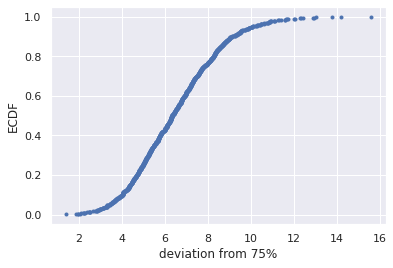

In [ ]:
x,y = ecdf(devs)
plt.plot(x,y, '.')
plt.xlabel("deviation from 75%")
plt.ylabel("ECDF")

From the plot, it looks like about 15%-20% of our simulations yielded a result of 4.7 or lower.

F. Compute a p-value from your simulated results. Do you agree with Fisher's argument that Mendel's data were too good?

In [ ]:
# look for results better than 4.7
num_better = np.sum(devs < 4.7)

# compute and display p-value
p_val = num_better / len(devs)
p_val

0.2

We get a p-value of 0.2, which matches well with what we saw by eye in the ECDF. At least with a cut-off of 0.05, we would not claim that Mendel's data were "too good." That is, if we repeat Mendel's experiment, we not too infrequently see results that are as good as what Mendel saw.